In [1]:
import h5py
import numpy as np
import pandas as pd
import bilby

In [9]:
filename = '/home/shunyin.cheung/GWOSC_PE_runs/posteriors/IGWN-GWTC2p1-v2-GW150914_095045_PEDataRelease_mixed_cosmo.h5'

In [7]:
def recursively_load_dict_contents_from_group(h5file, path):
    """
    Recursively load a HDF5 file into a dictionary

    .. versionadded:: 1.1.0

    Parameters
    ----------
    h5file: h5py.File
        Open h5py file object
    path: str
        Path within the HDF5 file

    Returns
    -------
    output: dict
        The contents of the HDF5 file unpacked into the dictionary.
    """
    import h5py

    output = dict()
    for key, item in h5file[path].items():
        if isinstance(item, h5py.Dataset):
            output[key] = decode_from_hdf5(item[()])
        elif isinstance(item, h5py.Group):
            output[key] = recursively_load_dict_contents_from_group(
                h5file, path + key + "/"
            )
    return output

def decode_from_hdf5(item):
    """
    Decode an item from HDF5 format to python type.

    This currently just converts __none__ to None and some arrays to lists

    .. versionadded:: 1.0.0

    Parameters
    ----------
    item: object
        Item to be decoded

    Returns
    -------
    output: object
        Converted input item
    """
    if isinstance(item, str) and item == "__none__":
        output = None
    elif isinstance(item, bytes) and item == b"__none__":
        output = None
    elif isinstance(item, (bytes, bytearray)):
        output = item.decode()
    elif isinstance(item, np.ndarray):
        if item.size == 0:
            output = item
        elif "|S" in str(item.dtype) or isinstance(item[0], bytes):
            output = [it.decode() for it in item]
        else:
            output = item
    elif isinstance(item, np.bool_):
        output = bool(item)
    else:
        output = item
    return output




In [10]:
with h5py.File(filename, "r") as ff:
    data = recursively_load_dict_contents_from_group(ff, '/')

In [5]:
calibration = data['C01:IMRPhenomXPHM']['calibration_envelope']
print(np.shape(calibration['H1']))
print(calibration)

(100, 7)
{'H1': array([[ 2.00000000e+01,  9.99757192e-01, -5.82177414e-03,
         9.86279119e-01, -1.65697132e-02,  1.01303087e+00,
         4.88621436e-03],
       [ 2.88484848e+01,  1.00142547e+00, -4.60744566e-03,
         9.86864674e-01, -1.62617413e-02,  1.01583449e+00,
         7.24218780e-03],
       [ 3.76969697e+01,  1.00143796e+00, -3.37350669e-03,
         9.90046628e-01, -1.30059882e-02,  1.01284583e+00,
         6.24710158e-03],
       [ 4.65454545e+01,  1.00120155e+00, -2.88989677e-03,
         9.87873440e-01, -1.42159119e-02,  1.01438820e+00,
         8.45647951e-03],
       [ 5.53939394e+01,  1.00068018e+00, -2.85482345e-03,
         9.89172277e-01, -1.27164020e-02,  1.01238436e+00,
         6.98922175e-03],
       [ 6.42424242e+01,  1.00050723e+00, -2.82304113e-03,
         9.87638609e-01, -1.41130608e-02,  1.01351467e+00,
         8.40953430e-03],
       [ 7.30909091e+01,  1.00054925e+00, -2.56555674e-03,
         9.86940219e-01, -1.46871365e-02,  1.01424379e+00,
  

In [11]:
config = data['C01:IMRPhenomXPHM']['config_file']['config']

for key in config.keys():
    print(f"{key}", config[key])

accounting ['ligo.prod.o3.cbc.pe.lalinference']
calibration-model ['CubicSpline']
catch-waveform-errors ['True']
channel-dict ['{ H1:DCS-CALIB_STRAIN_C02, L1:DCS-CALIB_STRAIN_C02, }']
coherence-test ['False']
convert-to-flat-in-component-mass ['False']
create-plots ['True']
create-summary ['False']
data-dict ['None']
data-format ['None']
deltaT ['0.2']
detectors ["['H1', 'L1']"]
distance-marginalization ['True']
distance-marginalization-lookup-table ['TD.npz']
duration ['4']
email ['None']
existing-dir ['None']
extra-likelihood-kwargs ['None']
frequency-domain-source-model ['lal_binary_black_hole']
gaussian-noise ['False']
generation-seed ['None']
gps-file ['None']
gps-tuple ['None']
ignore-gwpy-data-quality-check ['True']
injection ['False']
injection-dict ['None']
injection-file ['None']
injection-numbers ['None']
injection-waveform-approximant ['None']
jitter-time ['True']
label ['ProdF4']
likelihood-type ['GravitationalWaveTransient']
local ['False']
local-generation ['False']
loca

In [20]:
pd.set_option('display.max_columns', None)
print(pd.DataFrame(data['C01:IMRPhenomXPHM']['posterior_samples']))

       chirp_mass  mass_ratio       a_1       a_2    tilt_1    tilt_2  \
0       32.998255    0.894779  0.337057  0.409150  1.762067  1.451431   
1       33.278468    0.928053  0.072098  0.771528  2.339467  1.600667   
2       33.394474    0.829452  0.929423  0.392404  1.705331  1.392312   
3       29.478988    0.858610  0.416267  0.915496  1.468692  2.731394   
4       32.083172    0.685047  0.868888  0.264272  1.940685  0.788577   
...           ...         ...       ...       ...       ...       ...   
84028   32.020597    0.687695  0.155613  0.550959  0.250572  2.605320   
84029   32.091043    0.791587  0.715841  0.283287  2.126950  0.555537   
84030   30.458351    0.627784  0.258108  0.358304  2.397414  1.474620   
84031   32.811268    0.759463  0.271054  0.769068  0.564119  2.198036   
84032   32.159531    0.688488  0.111636  0.762336  1.170572  2.027687   

         phi_12    phi_jl  theta_jn       psi     phase   azimuth    zenith  \
0      0.660971  4.383066  2.714603  2.66638

In [21]:
print(data['C01:IMRPhenomXPHM']['posterior_samples']['log_likelihood'])

[61.49206648 61.10075751 59.12672626 ... 54.0100885  61.55253464
 60.3243443 ]


Make corner plots

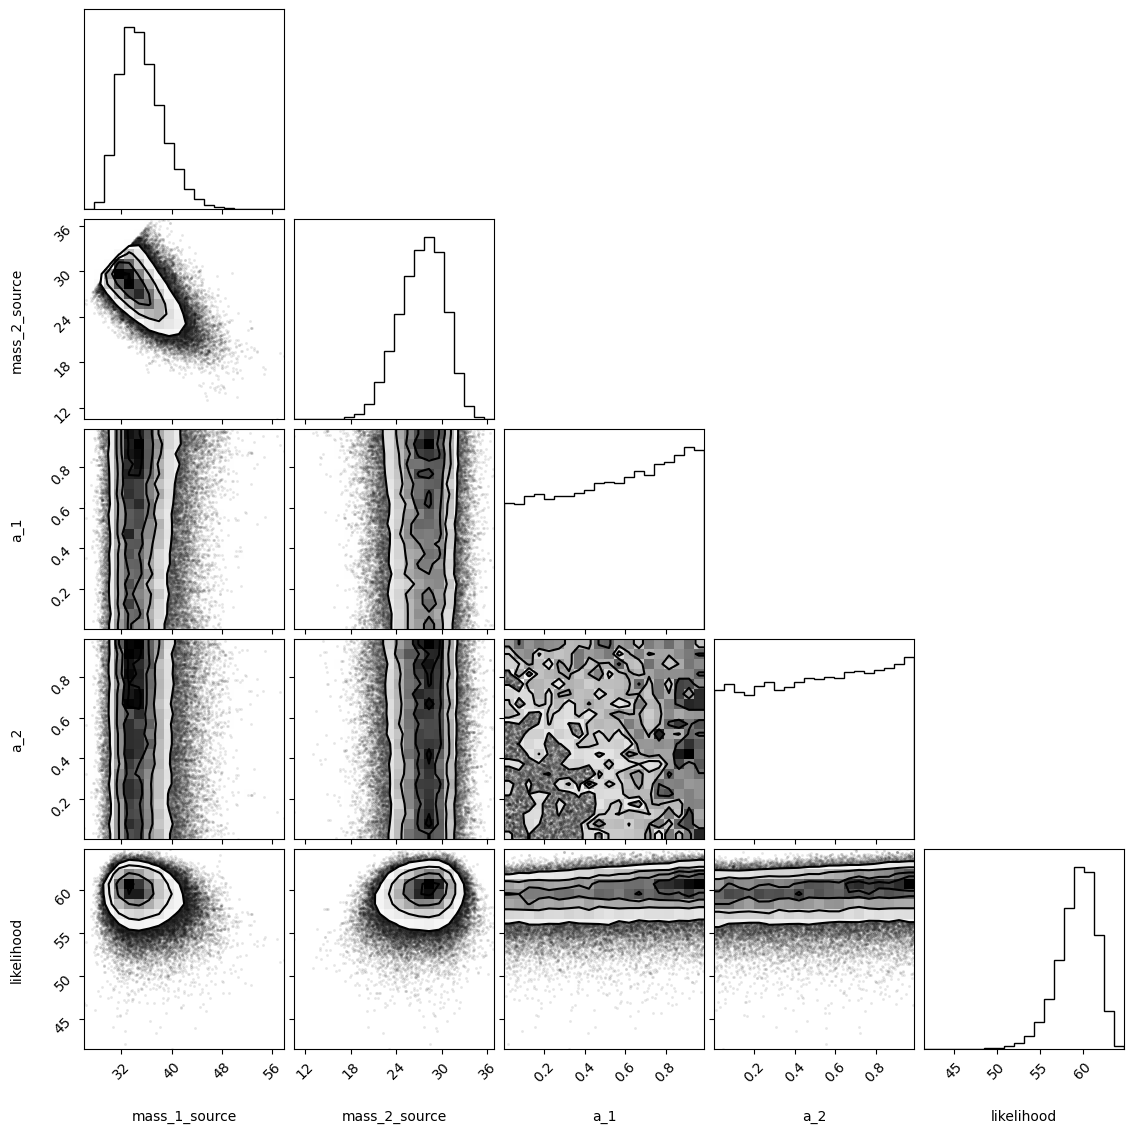

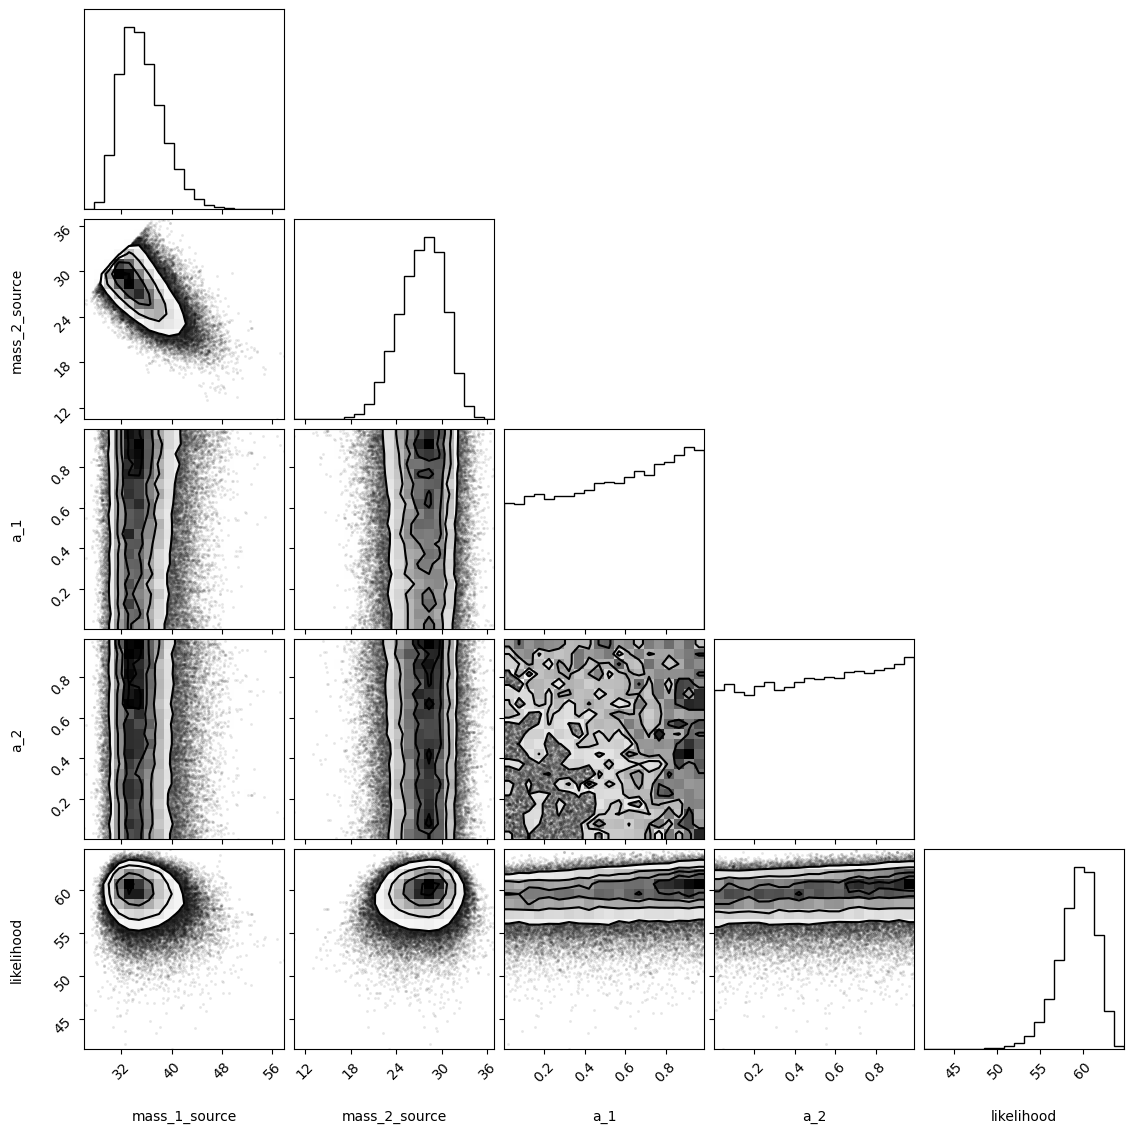

In [7]:
import corner

posterior = data['C01:IMRPhenomXPHM']['posterior_samples']
mass_1 = posterior['mass_1_source']
mass_2 = posterior['mass_2_source']
a_1 = posterior['a_1']
a_2 = posterior['a_2']
likelihood = posterior['log_likelihood']

samples = np.vstack([mass_1, mass_2, a_1, a_2, likelihood]).T
labels = ['mass_1_source', 'mass_2_source', 'a_1', 'a_2', 'likelihood']

corner.corner(samples, labels=labels)

# Create code to find path of distance lookup table

In [10]:
outdir= config['outdir'][0]
TD_name = config['distance-marginalization-lookup-table'][0]

outdir_split = outdir.split('/')
print(outdir_split)
path_TD = ''
for i in range(len(outdir_split)-1):
    path_TD += outdir_split[i]
    path_TD += '/'

path_TD += TD_name

print(path_TD)

['', 'home', 'daniel.williams', 'events', 'O3', 'o3a_final', 'run_directories', '', 'GW170818', 'ProdF7']
/home/daniel.williams/events/O3/o3a_final/run_directories//GW170818/TD.npz


In [11]:
import pandas as pd
import numpy as np
import bilby
import lal
import gwpy
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import copy

from waveforms import osc_freq_XPHM, mem_freq_XPHM_v2, mem_freq_XPHM_only
from create_post_dict import create_post_dict, extract_relevant_info

def call_data_GWOSC(logger, args, calibration, samples, detectors, start_time, end_time, psd_start_time, psd_end_time, duration, sampling_frequency, roll_off, minimum_frequency, maximum_frequency, psds_array=None, plot=False):
    
    ifo_list = bilby.gw.detector.InterferometerList([])
    
    # define interferometer objects
    for det in detectors:   
        logger.info("Downloading analysis data for ifo {}".format(det))
        ifo = bilby.gw.detector.get_empty_interferometer(det)
        
        channel_type = args['channel_dict'][det]
        channel = f"{det}:{channel_type}"
        
        kwargs = dict(
            start=start_time,
            end=end_time,
            verbose=False,
            allow_tape=True,
        )

        type_kwargs = dict(
            dtype="float64",
            subok=True,
            copy=False,
        )
        data = gwpy.timeseries.TimeSeries.get(channel, **kwargs).astype(
                **type_kwargs)
        
        # Resampling timeseries to sampling_frequency using lal.
        lal_timeseries = data.to_lal()
        lal.ResampleREAL8TimeSeries(
            lal_timeseries, float(1/sampling_frequency)
        )
        data = TimeSeries(
            lal_timeseries.data.data,
            epoch=lal_timeseries.epoch,
            dt=lal_timeseries.deltaT
        )
    
        # define some attributes in ifo
        ifo.strain_data.roll_off = roll_off
        ifo.maximum_frequency = maximum_frequency
        ifo.minimum_frequency = minimum_frequency
        
        # set data as the strain data
        ifo.strain_data.set_from_gwpy_timeseries(data)
        
        # compute the psd
        if det in psds_array.keys():
            print("Using pre-computed psd from results file")
            ifo.power_spectral_density = bilby.gw.detector.PowerSpectralDensity(
            frequency_array=psds_array[det][: ,0], psd_array=psds_array[det][:, 1]
            )
        else:
            print('Error: PSD is missing!')
            exit()

        ifo_list.append(ifo)

    return ifo_list

events_name = 'GW170818' 
file_path = '/home/shunyin.cheung/GWOSC_posteriors/IGWN-GWTC2p1-v2-GW170818_022509_PEDataRelease_mixed_cosmo.h5'
waveform = "C01:IMRPhenomXPHM"
data_file = None

samples, meta_dict, config_dict, priors, psds, calibration = create_post_dict(file_path, waveform)
args = extract_relevant_info(meta_dict, config_dict)

priors2 = copy.copy(priors)

logger = bilby.core.utils.logger

sampling_frequency = args['sampling_frequency']
maximum_frequency = args['maximum_frequency']
minimum_frequency = args['minimum_frequency']
reference_frequency = args['reference_frequency']
roll_off = args['tukey_roll_off']
duration = args['duration']
post_trigger_duration = args['post_trigger_duration']
trigger_time = args['trigger_time']
detectors = args['detectors']

detectors = args['detectors']
if 'V1' in detectors:
    detectors.remove('V1')

end_time = trigger_time + post_trigger_duration
start_time = end_time - duration

psd_duration = 32*duration # deprecated
psd_start_time = start_time - psd_duration # deprecated
psd_end_time = start_time # deprecated

ifo_list = call_data_GWOSC(logger, args, 
                            calibration, samples, detectors,
                            start_time, end_time, 
                            psd_start_time, psd_end_time, 
                            duration, sampling_frequency, 
                            roll_off, minimum_frequency, maximum_frequency,
                            psds_array=psds)

waveform_name = args['waveform_approximant']

amplitude = 100
print('amplitude = ',amplitude)

# test if bilby oscillatory waveform = gwmemory oscillatory waveform.
waveform_generator_osc = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= bilby.gw.source.lal_binary_black_hole,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            waveform_approximant=waveform_name,
                            )

)

# define oscillatory + memory model using gwmemory.
waveform_generator_full = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= mem_freq_XPHM_v2,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            roll_off=roll_off,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            bilby_generator = waveform_generator_osc,
                            amplitude=amplitude)

)

waveform_generator_mem = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= mem_freq_XPHM_only,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            roll_off=roll_off,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            bilby_generator = waveform_generator_osc,
                            amplitude=amplitude)

)

target_likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    ifo_list,
    waveform_generator_full,
    time_marginalization = True,
    distance_marginalization = True,
    distance_marginalization_lookup_table = path_TD,
    jitter_time=True,
    priors = priors,
    reference_frame = args['reference_frame'],
    time_reference = args['time_reference'],
)

17:32 bilby INFO    : Downloading analysis data for ifo L1


Jitter time setting cannot be found. Use default setting.
channel_dict {'H1': 'DCH-CLEAN_STRAIN_C02', 'L1': 'DCH-CLEAN_STRAIN_C02', 'V1': 'Hrec_hoft_V1O2Repro2A_16384Hz'}


17:32 bilby INFO    : Downloading analysis data for ifo H1


Using pre-computed psd from results file


17:32 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
17:32 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: waveforms.mem_freq_XPHM_v2
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
17:32 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: waveforms.mem_freq_XPHM_only
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


Using pre-computed psd from results file
amplitude =  100


17:32 bilby INFO    : Loaded distance marginalisation lookup table from /home/daniel.williams/events/O3/o3a_final/run_directories//GW170818/TD.npz.
